In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
y=df['output']
x=df.drop("output",axis=1)


In [ ]:
tree=DecisionTreeClassifier()
model=tree.fit(x,y)

In [ ]:
model.score(x,y)

1.0

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=16,train_size=0.70)

In [ ]:
# Train Test Split ile

tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)

0.7912087912087912

In [ ]:
model.predict([[31,1,2,130,240,0,0,150,0,2,0,0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

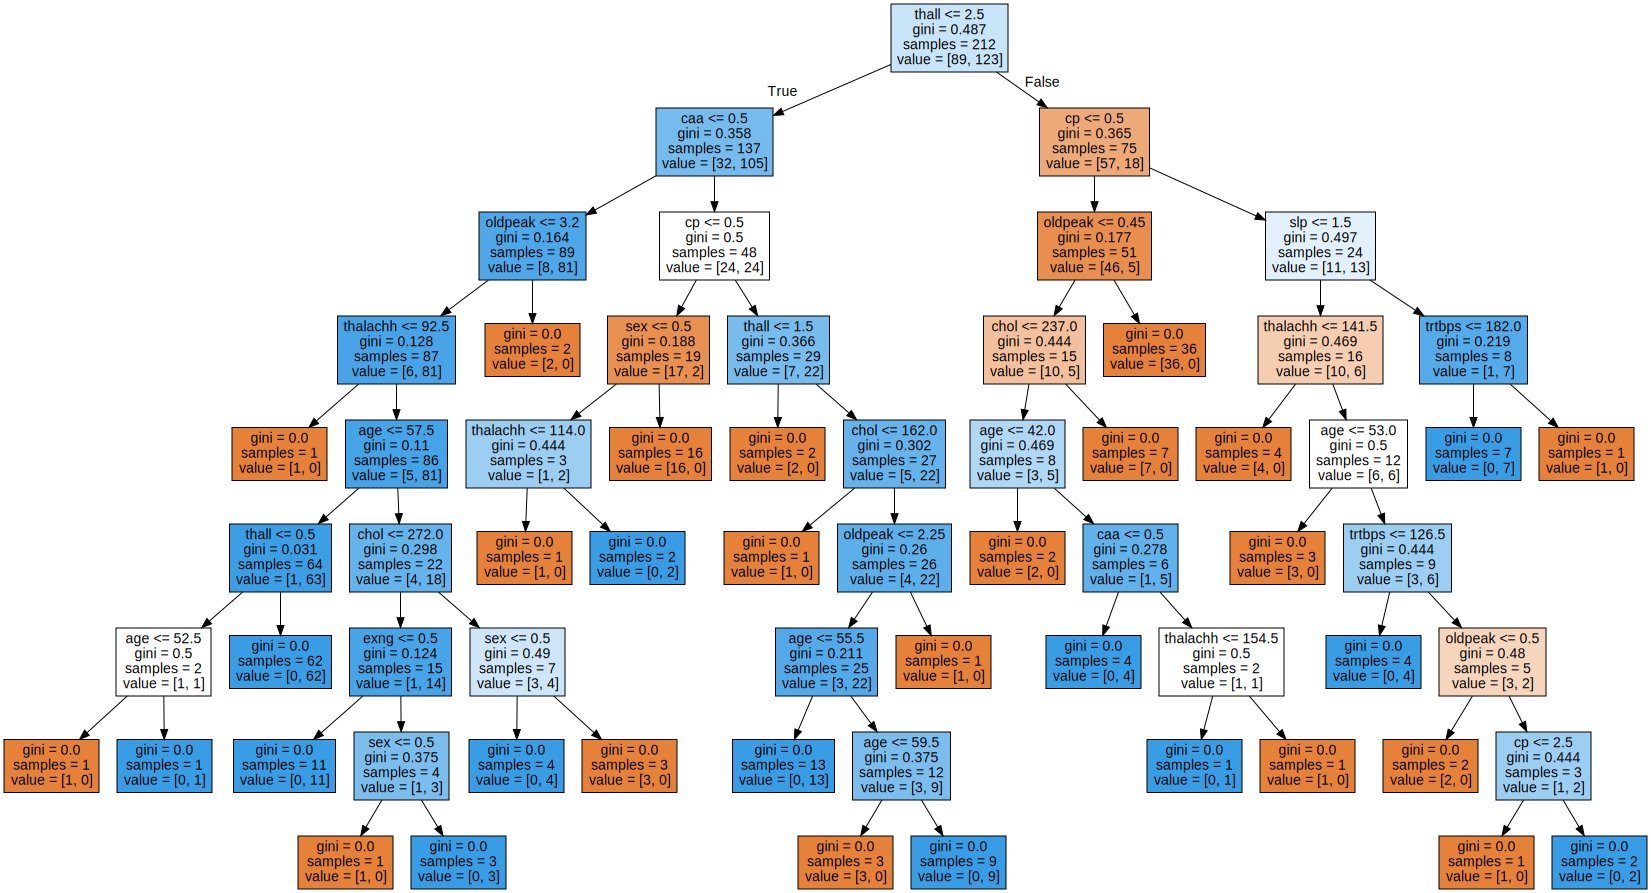

In [ ]:
dot=export_graphviz(model,feature_names=x.columns,filled=True)
gorsel=graphviz.Source(dot)
gorsel

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest=RandomForestClassifier()
model=forest.fit(x,y)
model.score(x,y)

1.0

In [ ]:
forest=RandomForestClassifier(n_estimators=400)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.8351648351648352

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
import xgboost as xgb

In [ ]:
rf=xgb.XGBClassifier()
modelrf=rf.fit(x_train,y_train)
modelrf.score(x_test,y_test)

0.8131868131868132

Sonuç olarak xgb decision treeden daha iyi ama random foresttan daha iyi bir sonuç elde etmedi.Bunun sebebi boostingde ağaçlar decision treeye göre daha genişletiliyor ama random forest gibi ensemble model değil.
